In [2]:
import pandas as pd
from sklearn import datasets
boston=datasets.load_boston()  
boston_df=pd.DataFrame(boston.data, columns=boston.feature_names)  
boston_df['target']=boston.target  
boston_df.head()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM per capita crime rate by town
ZN proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS proportion of non-retail business acres per town
CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)
RM average number of rooms per dwelling
AGE proportion of owner-occupied units built prior to 1940
DIS weighted distances to five Boston employment centers
RAD index of accessibility to radial highways
TAX full-value property-tax rate per $10,000
PTRATIO pupil-teacher ratio by town
B 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
LSTAT % lower status of the population
MEDV Median value of owner-occupied homes in $1000’s

<AxesSubplot:>

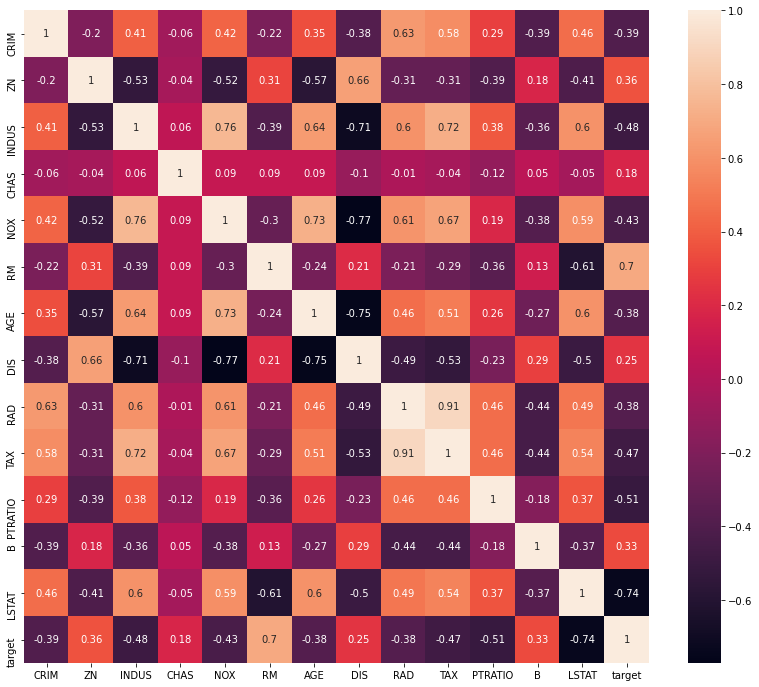

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = boston_df.corr().round(2)
plt.figure(figsize=(14, 12))  
sns.heatmap(data=correlation_matrix, annot=True)

Text(0, 0.5, 'price')

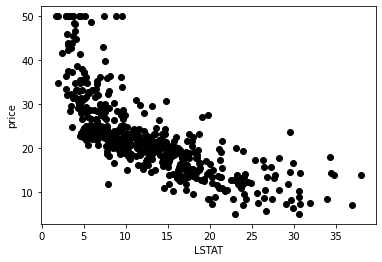

In [4]:
plt.scatter(boston_df['LSTAT'], boston_df['target'], color='black')
plt.xlabel('LSTAT')  
plt.ylabel('price')

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(boston_df[['LSTAT']], boston_df['target'], random_state=0)
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train,y_train)  
y_pred = lm.predict(X_test)

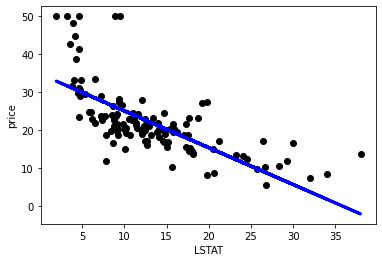

In [10]:
plt.scatter(X_test, y_test,  color='black')  
plt.plot(X_test, y_pred, color='blue', linewidth=3)  
  
plt.xlabel('LSTAT')  
plt.ylabel('price')   
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score  
print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))  
print("R2: {:.2f}".format(r2_score(y_test, y_pred)))

MSE: 44.31
R2: 0.46


In [12]:
result = pd.DataFrame({'Y_test':y_test,'y_pred':y_pred})
result

,Y_test,y_pred
329,22.6,27.662083
371,50.0,25.536402
219,23.0,24.594890
403,8.3,15.597141
78,21.2,22.808929
...,...,...
49,19.4,19.062293
498,21.2,22.245963
309,20.3,25.109324
124,18.8,17.722822


What is mean square error (MSE)?
Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values y1, y2, y3, … and the predicted ones pred(y1), pred(y2), pred(y3), … We square each difference (pred(yn) – yn)) ** 2 so that negative and positive values do not cancel each other out.

R2 score
…the proportion of the variance in the dependent variable that is predictable from the independent variable(s).”

Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

In [7]:
X_train, X_test, y_train, y_test= train_test_split(boston_df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE', 'DIS','RAD','TAX','PTRATIO','B','LSTAT']], boston_df['target'],random_state=0)  
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train,y_train)  
y_pred = lm.predict(X_test)  
#let's evaluate our results
from sklearn.metrics import mean_squared_error, r2_score  
print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))  
print("R2: {:.2f}".format(r2_score(y_test, y_pred)))

MSE: 29.78
R2: 0.64


In [ ]:
https://www.kaggle.com/datasets/mirichoi0218/insurance